In [1]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate

In [25]:
#  define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


In [39]:
# threehits
threehit_files_s0p_10minus4= glob.glob('AML_cases//threehit_s0p_10minus4//*')
print(len(threehit_files_s0p_10minus4))
threehit_files_s0p_10minus5= glob.glob('AML_cases//threehit_s0p_10minus5//*')
print(len(threehit_files_s0p_10minus5))
threehit_files_s0p_10minus6= glob.glob('AML_cases//threehit_s0p_10minus6//*')
print(len(threehit_files_s0p_10minus6))

threehit_files_s15p_10minus4= glob.glob('AML_cases//threehit_s15p_10minus4//*')
print('threehit_files_s15p_10minus4',len(threehit_files_s15p_10minus4))
threehit_files_s15p_10minus5= glob.glob('AML_cases//threehit_s15p_10minus5*//*')
print('threehit_files_s15p_10minus5',len(threehit_files_s15p_10minus5))
threehit_files_s15p_10minus6= glob.glob('AML_cases//threehit_s15p_10minus6*//*')
print('threehit_files_s15p_10minus6',len(threehit_files_s15p_10minus6))

threehit_files_s30p_10minus4= glob.glob('AML_cases//Threehit_s30p_10minus4//*')
print('threehit_files_s30p_10minus4',len(threehit_files_s30p_10minus4))
threehit_files_s30p_10minus5= glob.glob('AML_cases//Threehit_s30p_10minus5//*')
print('threehit_files_s30p_10minus5',len(threehit_files_s30p_10minus5))
threehit_files_s30p_10minus6= glob.glob('AML_cases//Threehit_s30p_10minus6_2//*')
print('threehit_files_s30p_10minus6',len(threehit_files_s30p_10minus6))

list_of_t3_sample_no = [3000000,300000,300000,3000,303000,3003000,3000,3000,300000]

2092
2
0
threehit_files_s15p_10minus4 2879
threehit_files_s15p_10minus5 8889
threehit_files_s15p_10minus6 265
threehit_files_s30p_10minus4 3000
threehit_files_s30p_10minus5 1424
threehit_files_s30p_10minus6 1533


In [34]:
# fourhits
files_s0p_10minus4= glob.glob('AML_cases//AML_cases//Fourhit_s0p_10minus4_outof_3times10to8//*')
files_s0p_10minus5= glob.glob('AML_cases//AML_cases//Fourhit_s0p_10minus5_outof_12times10to8//*')
files_s15p_10minus4= glob.glob('AML_cases//AML_cases//Fourhit_s15p_10minus4//*')
files_s15p_10minus5= glob.glob('AML_cases//AML_cases//Fourhit_s15p_10minus5//*')
files_s15p_10minus6= glob.glob('AML_cases//AML_cases//Fourhit_s15p_10minus6//*')
files_s30p_10minus4= glob.glob('AML_cases//AML_cases//Fourhit_s30p_10minus4//*')
files_s30p_10minus5= glob.glob('AML_cases//AML_cases//Fourhit_s30p_10minus5//*')
files_s30p_10minus6= glob.glob('AML_cases//AML_cases//Fourhit_s30p_10minus6//*')

list_of_classes = [files_s0p_10minus4,files_s0p_10minus5,files_s15p_10minus4,files_s15p_10minus5,files_s15p_10minus6,
                  files_s30p_10minus4,files_s30p_10minus5,files_s30p_10minus6]
list_of_sample_no = [3*10**8, 12*10**8,30000,3000000,3000000*10,30000,30000,3000000]
labels = ['s=0, $\mu=10^{-4}$','s=0, $\mu=10^{-5}$','s=0.15, $\mu=10^{-4}$','s=0.15, $\mu=10^{-5}$','s=0.15, $\mu=10^{-6}$',
         's=0.30, $\mu=10^{-4}$','s=0.30, $\mu=10^{-5}$','s=0.30, $\mu=10^{-6}$']
linestyles = ['dashed', 'dotted','dashed', 'dotted','solid','dashed', 'dotted','solid']
colours = ['#3182bd','#3182bd','#a1d99b','#a1d99b','#a1d99b', '#756bb1','#756bb1','#756bb1']
# print(len(files))

In [33]:
def extract_t4_list(files):
    
    list_of_t4 = []
    for file in files:
        with open(file, "rb") as fp:
            list_of_waiting_times = json.load(fp)
            t1 = list_of_waiting_times[0]
            t2 = list_of_waiting_times[1]
            t3 = list_of_waiting_times[2]
            t4 = list_of_waiting_times[3]
            list_of_t4.append(t4)
            
    return list_of_t4

def extract_t3_list(files):
    
    list_of_t3 = []
    for file in files:
        with open(file, "rb") as fp:
            list_of_waiting_times = json.load(fp)
            t1 = list_of_waiting_times[0]
            t2 = list_of_waiting_times[1]
            t3 = list_of_waiting_times[2]
#             t4 = list_of_waiting_times[3]
            list_of_t3.append(t3)
            
    return list_of_t3

In [43]:
def plot_aml_incidence(list_of_t4,normed_value, lab,designated_col, m,n):  
    
    scale = 1
    bins_without_limits = np.linspace(0, 100, 201)
    
    def histogramming(desired_list, normed_value):

        hist, bins = np.histogram(desired_list,  bins = bins_without_limits)
        bin_centres = (bins[:-1] + bins[1:])/2
        widths = np.diff(bins)[0]   
        normalised_hist = hist/(normed_value*widths)
        cum_hist = np.cumsum(hist/normed_value)
 
        return bin_centres, normalised_hist, cum_hist
    
    bin_centres, normalised_hist, cum_hist = histogramming(list_of_t4, normed_value)
    ax1[m][n].plot(bin_centres, np.log(cum_hist),  label = lab, color = designated_col)
    ax1[m][n].fill_between(cumulative_by_age, np.log(male_epidemiological_risk), np.log(female_epidemiological_risk),color = grey3)
#     print(np.log(normalised_hist))
    ax1[m][n].set_xlabel('age', fontsize = 15)
    x_major_ticks =   [20,40,60,80,100]
    x_major_tick_labels =  [20,40,60,80,100]
    ax1[m][n].set_xticks(x_major_ticks)
    ax1[m][n].set_xticklabels(x_major_tick_labels, fontsize = 15)
    ax1[m][n].xaxis.set_tick_params(width=1, length = 6)
    ax1[m][n].set_xlim(0, 70)

#     ax1[m][n].set_ylabel('cumulative prob.', fontsize = 15, labelpad = 6*scale, fontweight = 'medium')
    ax1[m][n].set_yticks([np.log(10**-6),np.log(10**-4),np.log(10**-2),np.log(10**0)])
    ax1[m][n].set_yticklabels(['$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize = 15)
    ax1[m][n].yaxis.set_tick_params(width=1, length = 6)
    ax1[m][n].set_ylim(np.log(10**-6), 0)

    ax1[m][n].legend(loc='upper left', bbox_to_anchor=(0.03, 1.0), frameon=0, fontsize = 15)

    return ax1


C:\Users\chickchick\AppData\Local\Temp\ipykernel_46684\3186691497.py:17: RuntimeWarning: divide by zero encountered in log
  ax1[m][n].plot(bin_centres, np.log(cum_hist),  label = lab, color = designated_col)


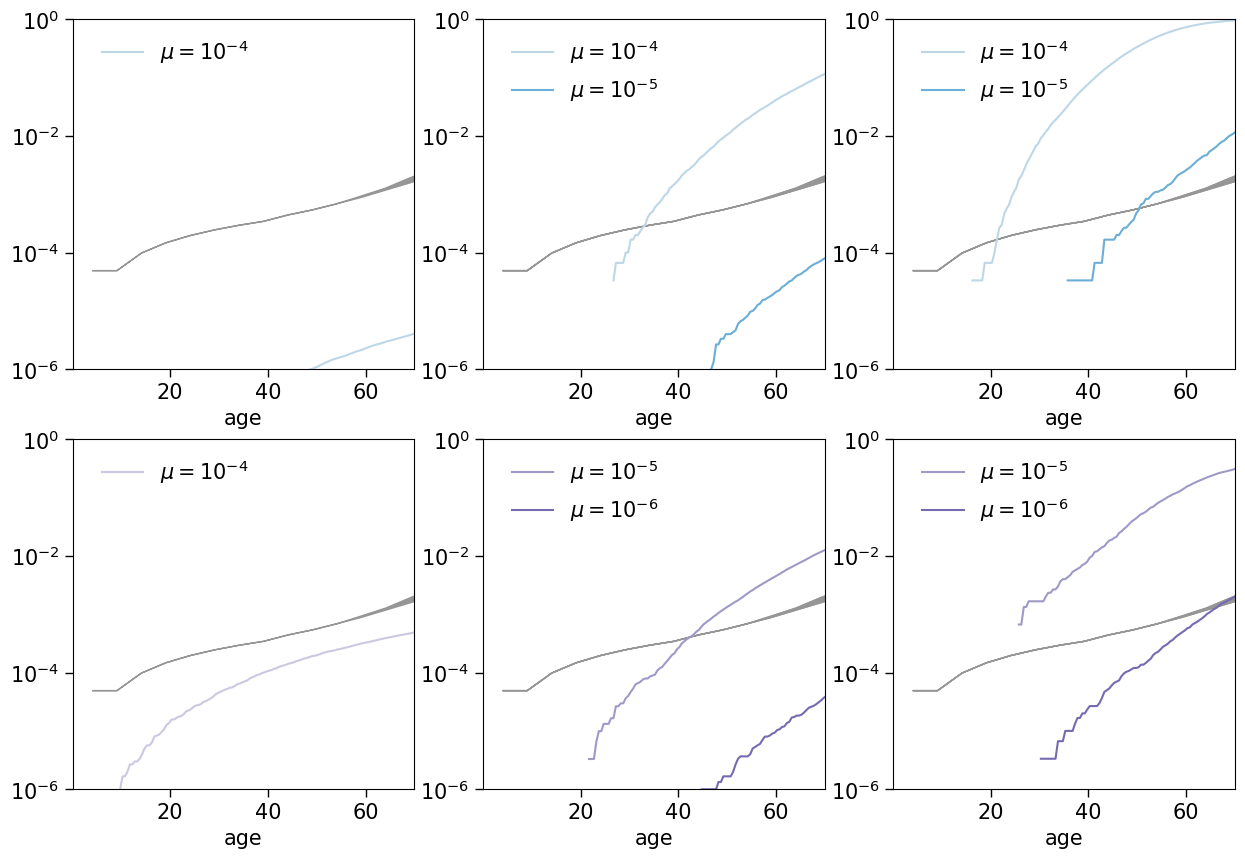

In [44]:
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(2,3, figsize=(15,10))


list_of_t4 = extract_t4_list(files_s0p_10minus4)
normed_value = list_of_sample_no[0]
plot_aml_incidence(list_of_t4,normed_value, '$\mu=10^{-4}$', blue2, 0,0)
# list_of_t4 = extract_t4_list(files_s0p_10minus5)
# normed_value = list_of_sample_no[1]
# plot_aml_incidence(list_of_t4,normed_value,'$\mu=10^{-5}$', purple3, 0,0)
# plot_Armitage_and_Doll_k4(10**-5, '$\mu=10^{-5}$ (analy.)',0, 0)
# plot_Armitage_and_Doll_k4(10**-6, '$\mu=10^{-6}$ (analy.)',0, 0)

list_of_t4 = extract_t4_list(files_s15p_10minus4)
normed_value = list_of_sample_no[2]
plot_aml_incidence(list_of_t4,normed_value, '$\mu=10^{-4}$', blue2, 0,1)
list_of_t4 = extract_t4_list(files_s15p_10minus5)
normed_value = list_of_sample_no[3]
plot_aml_incidence(list_of_t4,normed_value,'$\mu=10^{-5}$', blue3, 0,1)
# list_of_t4 = extract_t4_list(files_s15p_10minus6)
# normed_value = list_of_sample_no[4]
# plot_aml_incidence(list_of_t4,normed_value,'$\mu=10^{-6}$', purple4,  0,1)

list_of_t4 = extract_t4_list(files_s30p_10minus4)
normed_value = list_of_sample_no[5]
plot_aml_incidence(list_of_t4,normed_value, '$\mu=10^{-4}$', blue2, 0,2)
list_of_t4 = extract_t4_list(files_s30p_10minus5)
normed_value = list_of_sample_no[6]
plot_aml_incidence(list_of_t4,normed_value,'$\mu=10^{-5}$', blue3, 0,2)
# list_of_t4 = extract_t4_list(files_s30p_10minus6)
# normed_value = list_of_sample_no[7]
# plot_aml_incidence(list_of_t4,normed_value, '$\mu=10^{-6}$', purple4, 0,2)

# plot_Armitage_and_Doll_k3(10**-4, '$\mu=10^{-4}$ (analy.)',1, 0)
# plot_Armitage_and_Doll_k3(10**-5, '$\mu=10^{-5}$ (analy.)',1, 0)
list_of_t3 = extract_t3_list(threehit_files_s0p_10minus4)
normed_value = list_of_t3_sample_no[0]
plot_aml_incidence(list_of_t3,normed_value, '$\mu=10^{-4}$', purple2,1,0)
list_of_t3 = extract_t3_list(threehit_files_s0p_10minus5)


list_of_t3 = extract_t3_list(threehit_files_s15p_10minus5)
normed_value = list_of_t3_sample_no[4]
plot_aml_incidence(list_of_t3,normed_value, '$\mu=10^{-5}$',purple3, 1,1)
list_of_t3 = extract_t3_list(threehit_files_s15p_10minus6)
normed_value = list_of_t3_sample_no[5]
plot_aml_incidence(list_of_t3,normed_value,'$\mu=10^{-6}$',purple4, 1,1)


list_of_t3 = extract_t3_list(threehit_files_s30p_10minus5)
normed_value = list_of_t3_sample_no[7]
plot_aml_incidence(list_of_t3,normed_value,'$\mu=10^{-5}$', purple3, 1,2)
list_of_t3 = extract_t3_list(threehit_files_s30p_10minus6)
normed_value = list_of_t3_sample_no[8]
plot_aml_incidence(list_of_t3,normed_value, '$\mu=10^{-6}$',purple4, 1,2)

plt.savefig('Graphs/Simulated_AML_incidence_compared_to_actual.pdf', bbox_inches = 'tight')

# Stored epidemiological risk

In [7]:
cumulative_by_age = [ 4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79]
male_epidemiological_risk = [0.00005,0.00005,0.0001,0.00015,0.0002,0.00025,0.0003,0.00035,0.00045,0.00055,0.0007,0.00095,0.0013,0.00195,0.00285,0.0042]
female_epidemiological_risk = [0.00005,0.00005,0.0001,0.00015,0.0002,0.00025,0.0003,0.00035,0.00045,0.00055,0.0007,0.0009,0.0012,0.0016,0.00215,0.00285
                              ]